importing all required packages and reading the csv file

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#import datetime as dt
from dateutil.parser import parse
from numpy import inf
import matplotlib.pyplot as plt
import seaborn as sns
#from scipy.optimize import newton
#from scipy.special import psi, polygamma
from scipy.stats import norm, kde, kstest
from numpy import inf,linspace
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import random
import math
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('google_drive_nanreplaced.csv')

In [2]:
df.head()

,time,1day_active_users,1day_google_documents_active_users,1day_google_drawings_active_users,1day_google_forms_active_users,1day_google_presentations_active_users,1day_google_sites_active_users,1day_google_spreadsheets_active_users,1day_other_types_active_users,30day_active_users,...,owned_items_with_visibility_unknown_delta,owned_items_with_visibility_unknown_removed,owned_other_types_added,owned_other_types_created,owned_other_types_delta,owned_other_types_edited,owned_other_types_removed,owned_other_types_trashed,owned_other_types_viewed,sharers
0,2017-03-12 05:00:00,1543.0,2499.954068,7.240157,54.104987,474.077428,25.604369,1107.56168,1314.187664,15955.695538,...,0.0,0.0,0.0,3509.0,0.0,193.0,0.0,173.0,1173.0,0.0
1,2017-03-14 04:00:00,2495.0,2499.954068,7.240157,54.104987,474.077428,25.604369,1107.56168,1314.187664,15955.695538,...,0.0,0.0,0.0,6275.0,0.0,837.0,0.0,1018.0,1759.0,0.0
2,2017-03-16 04:00:00,2403.0,2499.954068,7.240157,54.104987,474.077428,25.604369,1107.56168,1314.187664,15955.695538,...,0.0,0.0,0.0,22084.0,0.0,820.0,0.0,805.0,1451.0,0.0
3,2017-03-19 04:00:00,2848.0,2499.954068,7.240157,54.104987,474.077428,25.604369,1107.56168,1314.187664,15955.695538,...,0.0,0.0,0.0,51355.0,0.0,725.0,0.0,737.0,1247.0,0.0
4,2017-03-20 04:00:00,5302.0,2499.954068,7.240157,54.104987,474.077428,25.604369,1107.56168,1314.187664,15955.695538,...,0.0,0.0,0.0,9979.0,0.0,1330.0,0.0,924.0,2339.0,0.0


fitting the distributions for the google documents created and google documents edited.

In [3]:
data1=df[['time','google_documents_created']]

In [4]:
data1.head()

,time,google_documents_created
0,2017-03-12 05:00:00,0.0
1,2017-03-14 04:00:00,0.0
2,2017-03-16 04:00:00,0.0
3,2017-03-19 04:00:00,0.0
4,2017-03-20 04:00:00,0.0


In [5]:
data1.tail()

,time,google_documents_created
826,2019-08-13 04:00:00,526.000000
827,2019-08-14 04:00:00,1110.248705
828,2019-08-15 04:00:00,1110.248705
829,2019-08-16 04:00:00,523.000000
830,2019-08-17 04:00:00,269.000000


In [6]:
data1.describe()

,google_documents_created
count,831.000000
mean,1110.248705
std,785.821708
min,0.000000
25%,465.000000
50%,994.000000
75%,1653.000000
max,3627.000000


In [7]:
data2= df[['time','google_documents_edited']]

In [8]:
data2.head()

,time,google_documents_edited
0,2017-03-12 05:00:00,0.0
1,2017-03-14 04:00:00,0.0
2,2017-03-16 04:00:00,0.0
3,2017-03-19 04:00:00,0.0
4,2017-03-20 04:00:00,0.0


In [9]:
data2.tail()

,time,google_documents_edited
826,2019-08-13 04:00:00,1085.000000
827,2019-08-14 04:00:00,2238.010363
828,2019-08-15 04:00:00,2238.010363
829,2019-08-16 04:00:00,1076.000000
830,2019-08-17 04:00:00,511.000000


In [10]:
data2.describe()

,google_documents_edited
count,831.000000
mean,2238.010363
std,1582.424139
min,0.000000
25%,956.000000
50%,1899.000000
75%,3328.000000
max,7798.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000191A0DCBF60>]],
      dtype=object)

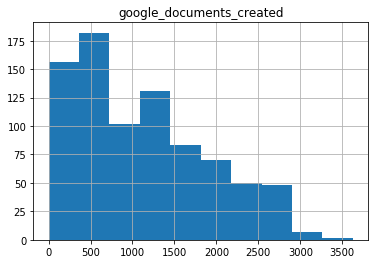

In [11]:
data1.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000191A0DD63C8>]],
      dtype=object)

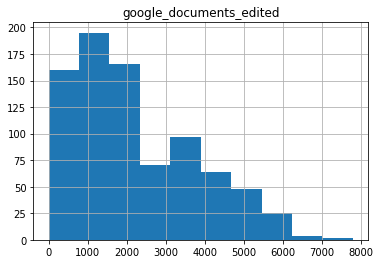

In [12]:
data2.hist()

In [13]:
data1['time'] = pd.to_datetime(data1['time'],utc=True)
data1.set_index('time', inplace=True)

Text(0.5, 0, 'Year')

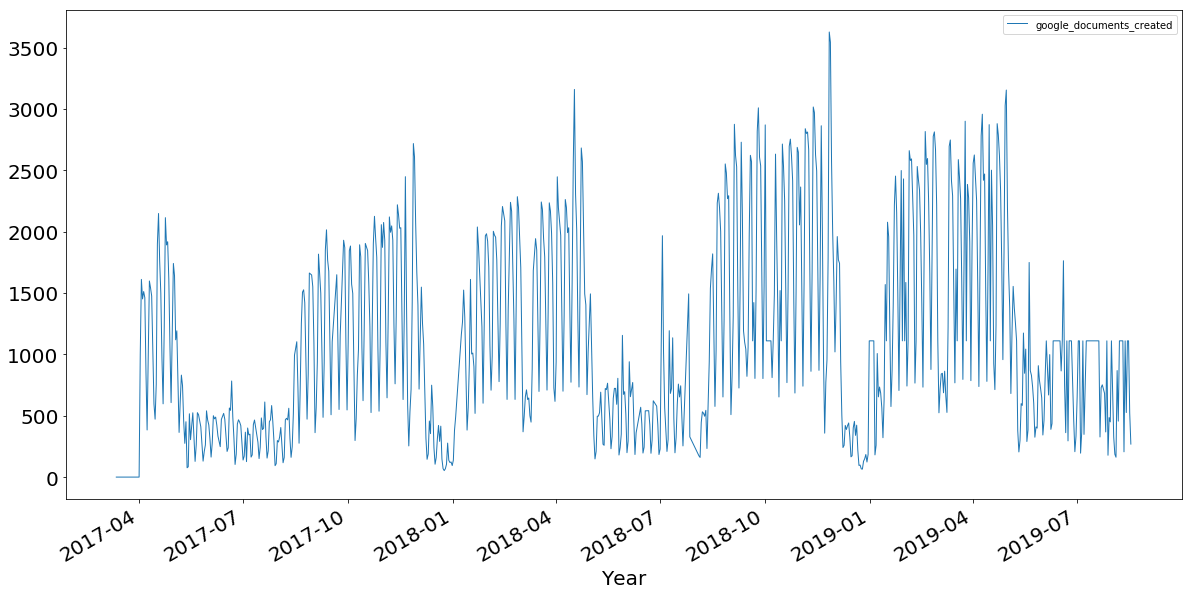

In [14]:
data1.plot(figsize=(20,10), linewidth=1, fontsize=20)
plt.xlabel('Year', fontsize=20)

In [15]:
data2['time'] = pd.to_datetime(data2['time'],utc=True)
data2.set_index('time', inplace=True)

Text(0.5, 0, 'Year')

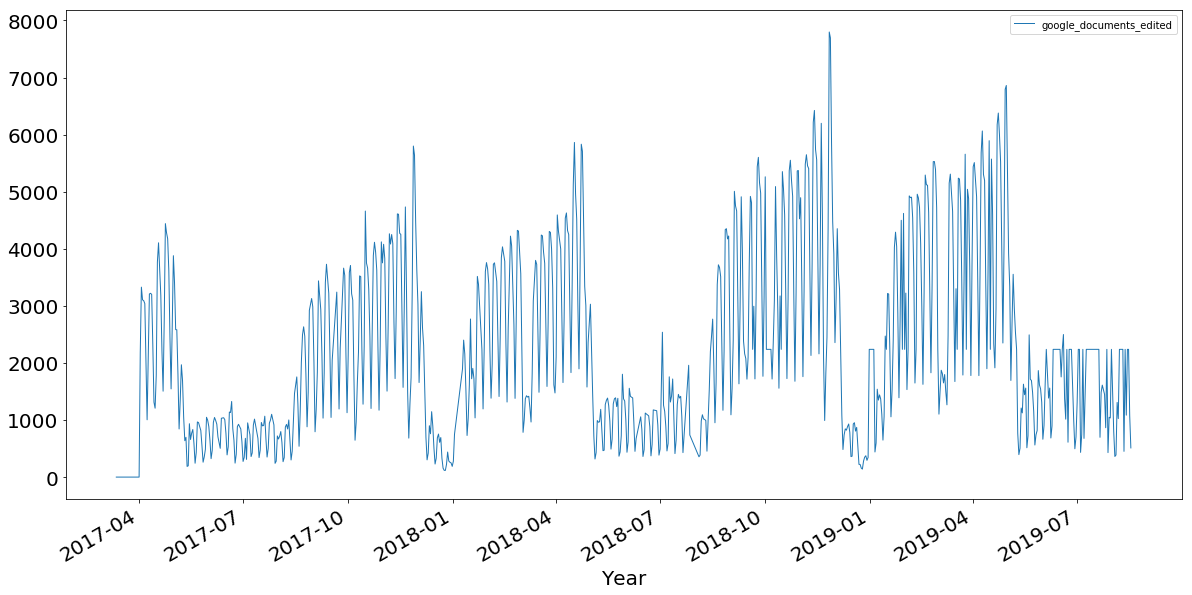

In [16]:
data2.plot(figsize=(20,10), linewidth=1, fontsize=20)
plt.xlabel('Year', fontsize=20)

In [17]:
alpha= norm.fit(df['google_documents_created'])[0]
beta= norm.fit(df['google_documents_created'])[1]
oiu= df['google_documents_created']
density= kde.gaussian_kde(oiu,bw_method=None)

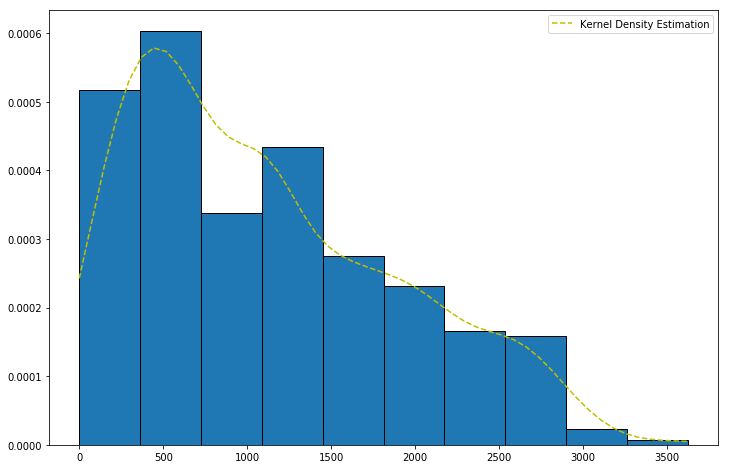

In [19]:
import numpy as np
oiu.hist(normed=True, bins=10, grid=False, ec='black', figsize=(12,8))
x = np.linspace(0, oiu.max())
xgrid = np.linspace(x.min(), x.max(), 100)
l3, = plt.plot(x, density(x), 'y--', label="Kernel Density Estimation")
plt.legend(handles=[l3])

In [21]:
my_cdf = lambda ary: np.array([density.integrate_box_1d(-np.inf, x) for x in ary])


In [22]:
kstest(oiu,my_cdf)

KstestResult(statistic=0.043731635269384395, pvalue=0.08086098973014355)

In [23]:
e= norm(alpha,beta)
kstest(oiu,e.cdf)

KstestResult(statistic=0.11060946242807768, pvalue=2.6079522985611447e-09)

In [27]:
alpha= norm.fit(df['google_documents_edited'])[0]
beta= norm.fit(df['google_documents_edited'])[1]
oiu= df['google_documents_edited']
density= kde.gaussian_kde(oiu,bw_method=None)

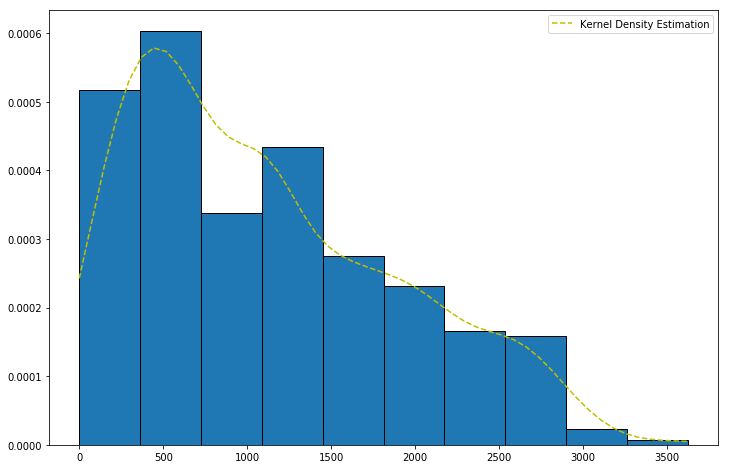

In [20]:
import numpy as np
oiu.hist(normed=True, bins=10, grid=False, ec='black', figsize=(12,8))
x = np.linspace(0, oiu.max())
xgrid = np.linspace(x.min(), x.max(), 100)
l3, = plt.plot(x, density(x), 'y--', label="Kernel Density Estimation")
plt.legend(handles=[l3])

In [21]:
my_cdf = lambda ary: np.array([density.integrate_box_1d(-np.inf, x) for x in ary])

In [22]:
kstest(oiu,my_cdf)

KstestResult(statistic=0.043731635269384395, pvalue=0.08086098973014355)

In [23]:
data1= df['google_documents_created']
users_sample= np.random.choice(a= data1,size= 300)
print(users_sample.mean())

1160.6165630397236


In [24]:
data1.mean()-users_sample.mean()

-50.3678583765095

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001918F78FCF8>]],
      dtype=object)

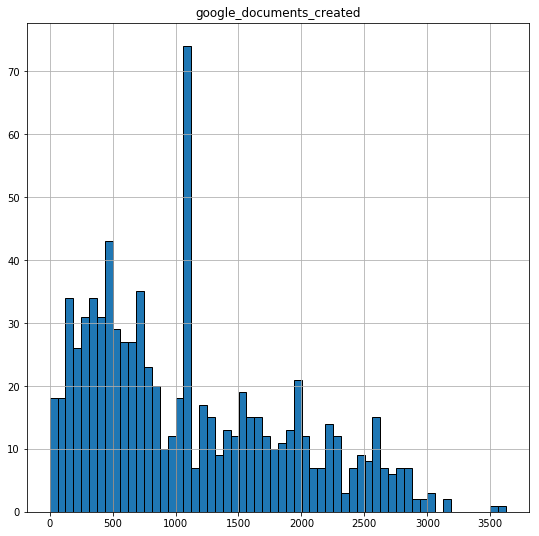

In [25]:
pd.DataFrame(data1).hist(bins=58,figsize=(9,9), ec='black')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000191A5595D30>]],
      dtype=object)

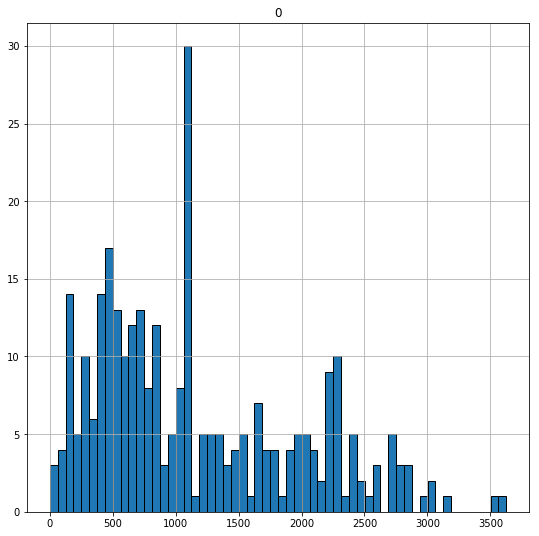

In [26]:
pd.DataFrame(users_sample).hist(bins=58,figsize=(9,9), ec='black')

using central limit theorem for google_documents_created

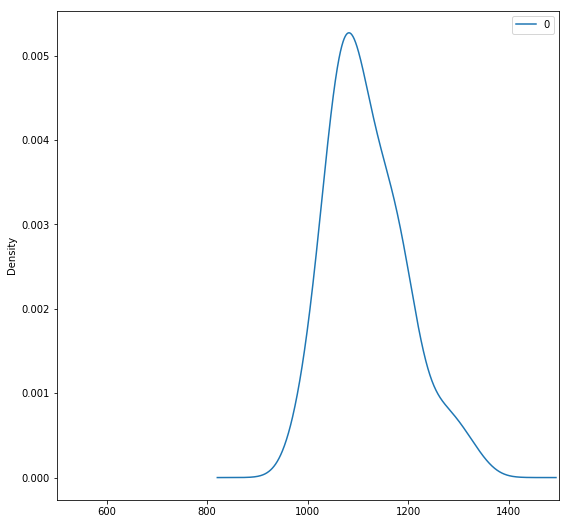

In [27]:
point_estimates = []         # Make empty list to hold point estimates
data1=df['google_documents_created']
for x in range(50):         # Generate 200 samples
    sample = np.random.choice(a= data1, size=100)
    point_estimates.append(sample.mean())
    
pd.DataFrame(point_estimates).plot(kind="density",  # Plot sample mean density
                                   figsize=(9,9),
                                   xlim=(500,1500)) 

In [28]:
data1.mean()- np.array(point_estimates).mean()


-7.492348186526897

In [29]:
np.random.seed(10)

sample_size = 300
sample = np.random.choice(a= data1, size = sample_size)
sample_mean = sample.mean()

z_critical = stats.norm.ppf(q = 0.975)  # Get the z-critical value*

print("z-critical value:")              # Check the z-critical value
print(z_critical)                        

users_stdev = data1.std()  # Get the population standard deviation

margin_of_error = z_critical * (users_stdev/math.sqrt(sample_size))

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

print("Sample Mean:")
print(sample_mean)

print("Confidence interval:")
print(confidence_interval)

z-critical value:
1.959963984540054
Sample Mean:
1142.6373920552678
Confidence interval:
(1053.7149286135784, 1231.5598554969572)


taking more sample from the google_documents_created to get confidence intervals.

In [30]:
np.random.seed(12)

sample_size = 100

intervals = []
sample_means = []

for sample in range(25):
    sample = np.random.choice(a= data1, size = sample_size)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)

    z_critical = stats.norm.ppf(q = 0.975)  # Get the z-critical value*         

    users_stdev = data1.std()  # Get the population standard deviation

    stats.norm.ppf(q = 0.025)

    margin_of_error = z_critical * (users_stdev/math.sqrt(sample_size))

    confidence_interval = (sample_mean - margin_of_error,
                           sample_mean + margin_of_error)  
    
    intervals.append(confidence_interval)

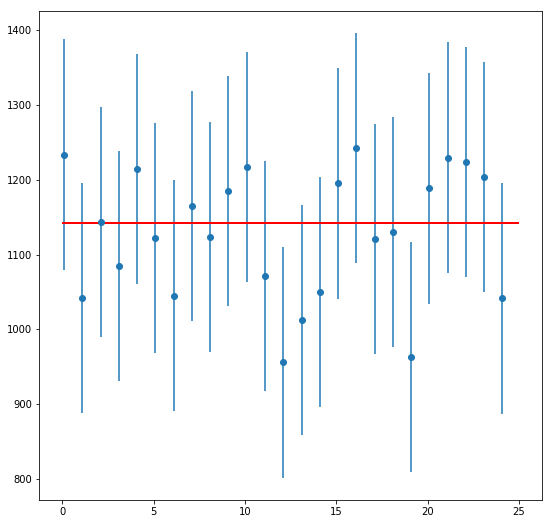

In [31]:
plt.figure(figsize=(9,9))

plt.errorbar(x=np.arange(0.1, 25, 1), 
             y=sample_means, 
             yerr=[(top-bot)/2 for top,bot in intervals],
             fmt='o')

plt.hlines(xmin=0, xmax=25,
           y=1142, 
           linewidth=2.0,
           color="red")

In [32]:
np.random.seed(10)

sample_size = 100
sample = np.random.choice(a= data1, size = sample_size)
sample_mean = sample.mean()

t_critical = stats.t.ppf(q = 0.975, df=99)  # Get the t-critical value*

print("t-critical value:")                  # Check the t-critical value
print(t_critical)                        

sample_stdev = sample.std()    # Get the sample standard deviation

sigma = sample_stdev/math.sqrt(sample_size)  # Standard deviation estimate
margin_of_error = t_critical * sigma

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

print("Confidence interval:")
print(confidence_interval)

t-critical value:
1.9842169515086827
Confidence interval:
(975.1241613970321, 1302.5406054423463)


In [33]:
# Check the difference between critical values with a sample size of 100
             
stats.t.ppf(q=0.975, df= 99) - stats.norm.ppf(0.975)  

0.024252966968628664

In [34]:
stats.t.interval(alpha = 0.95,              # Confidence level
                 df= 99,                    # Degrees of freedom
                 loc = sample_mean,         # Sample mean
                 scale = sigma)             # Standard deviation estimate

(975.1241613970321, 1302.5406054423463)

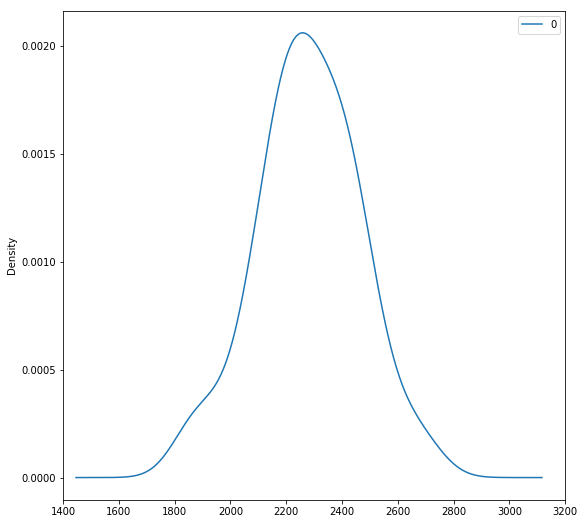

In [35]:
point_estimates = []         # Make empty list to hold point estimates
data2=df['google_documents_edited']
for x in range(50):         # Generate 100 samples
    sample = np.random.choice(a= data2, size=100)
    point_estimates.append(sample.mean())
    
pd.DataFrame(point_estimates).plot(kind="density",  # Plot sample mean density
                                   figsize=(9,9),
                                   xlim=(1400,3200)) 

In [36]:
data2.mean()- np.array(point_estimates).mean()

-41.160404145080065

In [37]:
np.random.seed(10)

sample_size = 100
sample = np.random.choice(a= data2, size = sample_size)
sample_mean = sample.mean()

z_critical = stats.norm.ppf(q = 0.975)  # Get the z-critical value*

print("z-critical value:")              # Check the z-critical value
print(z_critical)                        

users_stdev = data1.std()  # Get the population standard deviation

margin_of_error = z_critical * (users_stdev/math.sqrt(sample_size))

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

print("Sample Mean:")
print(sample_mean)

print("Confidence interval:")
print(confidence_interval)

z-critical value:
1.959963984540054
Sample Mean:
2258.290932642487
Confidence interval:
(2104.272708027295, 2412.309157257679)


In [38]:
np.random.seed(12)

sample_size = 100

intervals = []
sample_means = []

for sample in range(25):
    sample = np.random.choice(a= data2, size = sample_size)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)

    z_critical = stats.norm.ppf(q = 0.975)  # Get the z-critical value*         

    users_stdev = data1.std()  # Get the population standard deviation

    stats.norm.ppf(q = 0.025)

    margin_of_error = z_critical * (users_stdev/math.sqrt(sample_size))

    confidence_interval = (sample_mean - margin_of_error,
                           sample_mean + margin_of_error)  
    
    intervals.append(confidence_interval)

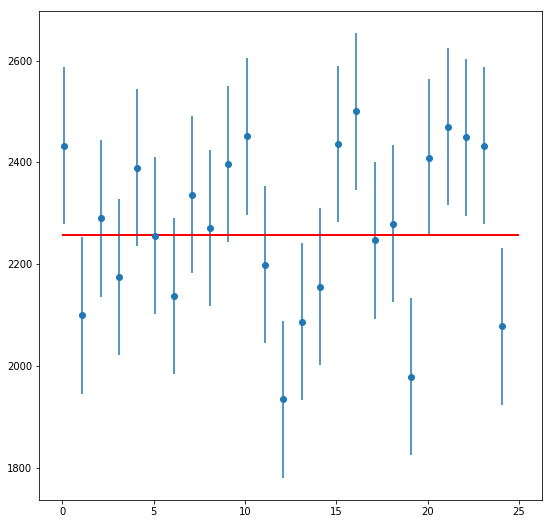

In [39]:
plt.figure(figsize=(9,9))

plt.errorbar(x=np.arange(0.1, 25, 1), 
             y=sample_means, 
             yerr=[(top-bot)/2 for top,bot in intervals],
             fmt='o')

plt.hlines(xmin=0, xmax=25,
           y=2258, 
           linewidth=2.0,
           color="red")

In [40]:
np.random.seed(10)

sample_size = 100
sample = np.random.choice(a= data2, size = sample_size)
sample_mean = sample.mean()

t_critical = stats.t.ppf(q = 0.975, df=99)  # Get the t-critical value*

print("t-critical value:")                  # Check the t-critical value
print(t_critical)                        

sample_stdev = sample.std()    # Get the sample standard deviation

sigma = sample_stdev/math.sqrt(sample_size)  # Standard deviation estimate
margin_of_error = t_critical * sigma

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

print("Confidence interval:")
print(confidence_interval)

t-critical value:
1.9842169515086827
Confidence interval:
(1940.3581652249245, 2576.2237000600494)


In [42]:
# Check the difference between critical values with a sample size of 100
             
stats.t.ppf(q=0.975, df= 99) - stats.norm.ppf(0.975)  

0.024252966968628664

In [43]:
stats.t.interval(alpha = 0.95,              # Confidence level
                 df= 99,                    # Degrees of freedom
                 loc = sample_mean,         # Sample mean
                 scale = sigma)             # Standard deviation estimate

(1940.3581652249245, 2576.2237000600494)

In [44]:
#df[df['google_forms_created'].value_counts].sum()
pd.DataFrame(df.groupby('time')['google_documents_edited'].count()).sum()

google_documents_edited    831
dtype: int64

In [45]:
z_critical = stats.norm.ppf(0.975)      # Record z-critical value

p = 0.831                              # Point estimate of proportion

n = 100                                # Sample size

margin_of_error = z_critical * math.sqrt((p*(1-p))/n)

confidence_interval = (p - margin_of_error,  # Calculate the the interval
                       p + margin_of_error) 

confidence_interval

(0.7575499737699527, 0.9044500262300472)

In [46]:
stats.norm.interval(alpha = 0.95,    # Confidence level             
                   loc =  0.831,     # Point estimate of proportion
                   scale = math.sqrt((p*(1-p))/n))  # Scaling factor

(0.7575499737699527, 0.9044500262300472)

In [47]:

data1=df['google_documents_created']
data2=df['google_documents_edited']
np.cov(data1, data2)[0,1]

1227254.9361570638

In [48]:
print('Covariance of X and Y: %.2f'%np.cov(data1, data2)[0, 1])
print('Correlation of X and Y: %.2f'%np.corrcoef(data1, data2)[0, 1])

Covariance of X and Y: 1227254.94
Correlation of X and Y: 0.99


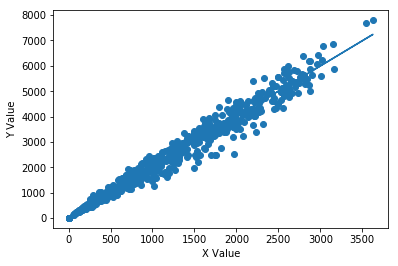

Correlation of X and Y: 0.99


In [49]:
X = data1
Y = data2

m, b = np.polyfit(X, Y, 1)

plt.scatter(X,Y)
plt.xlabel('X Value')
plt.ylabel('Y Value')
plt.plot(X, m*X + b, '-')
plt.show()
print('Correlation of X and Y: %.2f'%np.corrcoef(X, Y)[0, 1])

Hypothesis testing

In [50]:
datasample_documents_created= np.random.choice(a= data1, size = 100)

In [51]:
datasample_documents_edited= np.random.choice(a= data2, size = 100)

My hypotheis is that mean of documents_created and dodcuments edited are similar. 

In [52]:
print(data1.mean())
print(datasample_documents_created.mean())

1110.248704663214
1096.9023834196892


In [53]:
print(data2.mean())
print(datasample_documents_edited.mean())

2238.0103626942987
2383.750725388601


We see the mean values have slight difference, we conduct the 2sample ttest for our null hypothesis, 
The p value is > 0.05, so we fail to reject the null hypothesis.

In [54]:
datasample1= np.random.choice(a= data1, size = 100)
datasample2= np.random.choice(a= data1, size= 100)
print(datasample1.mean())
print(datasample2.mean())

1066.1948704663214
1214.1849222797928


In [55]:
stats.ttest_ind(a= datasample1,
                b= datasample2,
                equal_var=True) 

Ttest_indResult(statistic=-1.3635888082868437, pvalue=0.17424533399114356)

In [56]:
stats.ttest_rel(a= datasample1,
               b= datasample2)

Ttest_relResult(statistic=-1.289036430408587, pvalue=0.20038927145432367)

In [57]:
stats.ttest_1samp(a = datasample1, popmean = data1.mean())

Ttest_1sampResult(statistic=-0.6130323931153245, pvalue=0.5412606984221511)

In [58]:
stats.t.ppf(q=0.025,  # Quantile to check
            df=99)  # Degrees of freedom

-1.9842169515086832

In [59]:
sigma = data1.std()/math.sqrt(50)  # Sample stdev/sample size

stats.t.interval(0.025,                        # Confidence level
                 df = 99,                     # Degrees of freedom
                 loc = data1.mean(), # Sample mean
                 scale= sigma)                # Standard dev estimate

(1106.7572386974468, 1113.7401706289813)

In [60]:
stats.t.interval(alpha = 0.99,                # Confidence level
                 df = 99,                     # Degrees of freedom
                 loc = data1.mean(), # Sample mean
                 scale= sigma)                # Standard dev estimate

(818.3710877572114, 1402.1263215692168)